# Exploratory Data Analysis SuperStore

## Author: Rahul Kulkarni

### Problem Statement:
Perform Exploratory Data Analysis on the given data to find weak areas which hamper the profits for the organisation.

#### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Loading the data from the link and convert it into a pandas data frame.

In [2]:
store = pd.read_csv('https://drive.google.com/u/0/uc?id=1lV7is1B566UQPYzzY8R2ZmOritTW299S&export=download')
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### The quantity of data that we have.

In [3]:
store.shape

(9994, 13)

#### Attributes that we need to consider while analysing the data.

In [4]:
store.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

#### Checking if the datatypes of the attributes are correct.

In [5]:
store.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

#### Check if there is any missing data.

In [6]:
store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### Check for which countries is the data provided for.

In [7]:
store['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

Since the data is provided only for United States, we can safely drop the 'Country' and 'Postal Code' column from the data frame.

In [8]:
store.drop(['Country','Postal Code'],axis=1,inplace=True)
store.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### Total profit and sales for the store.

In [10]:
np,ns = store['Profit'].sum(),store['Sales'].sum()
print('Net Profit =',np)
print('Net Sales =',ns)
print('Operating Profit Ratio =',round(np/ns,2),'or',round((np/ns)*100,2),'%')

Net Profit = 286397.0217
Net Sales = 2297200.8603
Operating Profit Ratio = 0.12 or 12.47 %


Overall the performance of the store is not quite upto the mark, which can be clearly seen from the Operating Profit Ratio. Let's analyse the data to a deeper level to check which areas need improvement.

Since the further analysis conatains numerous plots, predominantely Bar charts and Pie Charts. To ease the visualizaion process, I have created functions to quickly generate the required plots.

In [35]:
def plotbar(w,h,x,y1,y2,y1label,y2label,title,xlabel,ylabel):
    plt.figure(figsize=(w,h))
    plot = sns.barplot(x=x,y=y1,color='b',label=y1label)
    sns.barplot(x=x,y=y2,color='r',label=y2label)
    plot.set_xticklabels(x, rotation=90)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid()
    plt.show()
def pieplot(x,l,r,title):
    print(title)
    plt.pie(x=x,labels=l,autopct='%1.1f%%',radius=r)
    plt.show()

#### Areas to analyse
I have divided my analysis into 5 parts, which take a look at different attributes and their relations with profit and sales.
1. Geographical Attributes (Region, State and City)
2. Category of Products
3. Customer Segement
4. Shipping Mode
5. Discounts

#### Geographical Attributes
Let's take a look the distribution of profit and sales across different regions.

In [12]:
store.groupby('Region')[['Sales','Profit']].sum()

,Sales,Profit
Region,,
Central,501239.8908,39706.3625
East,678781.2400,91522.7800
South,391721.9050,46749.4303
West,725457.8245,108418.4489


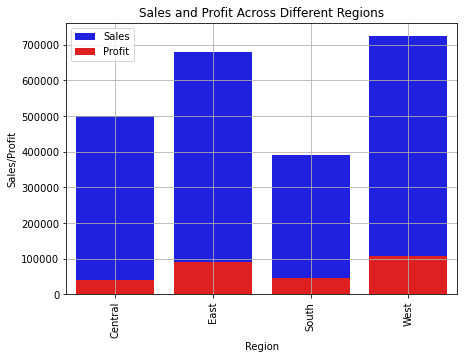

Sales Distribution Across Regions


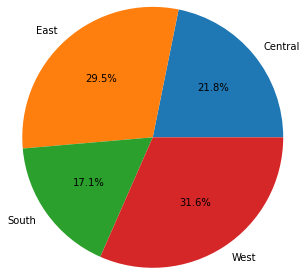

Profit Distribution Across Regions


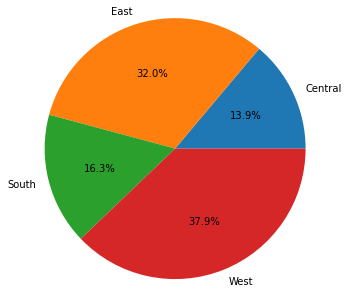

In [14]:
regions = sorted(store['Region'].unique())
sales = store.groupby('Region')['Sales'].sum()
profits = store.groupby('Region')['Profit'].sum()
plotbar(7,5,regions,sales,profits,'Sales','Profit','Sales and Profit Across Different Regions','Region','Sales/Profit')
pieplot(sales,regions,1.5,'Sales Distribution Across Regions')
pieplot(profits,regions,1.5,'Profit Distribution Across Regions')

Important Inferences:
1. Majority of sales are obtained from the West and East regions, they make up 61.1% of the total sales. Similar sort of distribution is seen in the profits, they make up of almost 70% of the total profits.
2. Even though the Central region has a higher sales than South, it has lower profits.

Let's take a look at the profit and sales distribution across various states.

In [15]:
store.groupby('State')[['Sales','Profit']].sum()

,Sales,Profit
State,,
Alabama,19510.6400,5786.8253
Arizona,35282.0010,-3427.9246
Arkansas,11678.1300,4008.6871
California,457687.6315,76381.3871
Colorado,32108.1180,-6527.8579
Connecticut,13384.3570,3511.4918
Delaware,27451.0690,9977.3748
District of Columbia,2865.0200,1059.5893
Florida,89473.7080,-3399.3017


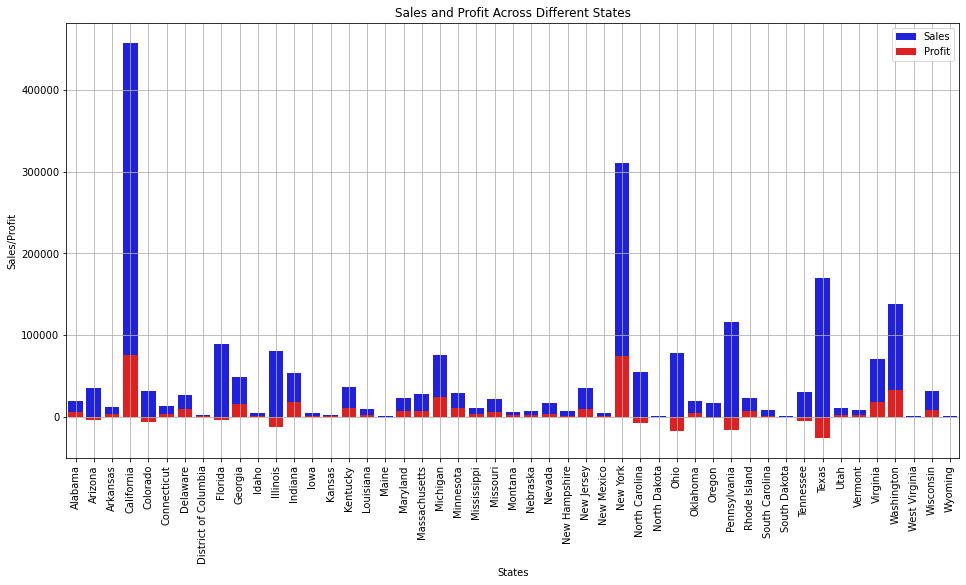

In [16]:
states = sorted(store['State'].unique())
sales = store.groupby('State')['Sales'].sum()
profits = store.groupby('State')['Profit'].sum()
plotbar(16,8,states,sales,profits,'Sales','Profit','Sales and Profit Across Different States','States','Sales/Profit')

Important Inferences:
1. California has the highest sales and profits but operating profit ratio seems low.
2. Even though Texas has mid range sales, it has the lowest profits among all states.
3. The condition in Texas needs immediate improvement, since it can be seen from the plot that states which have less sales than Texas have also churned out profits.

Let's analyse the data for states which churn out losses.

In [17]:
loss = []
for i in range(len(profits)):
    if profits[i]<0:
        loss.append(states[i])
print(', '.join(loss))

Arizona, Colorado, Florida, Illinois, North Carolina, Ohio, Oregon, Pennsylvania, Tennessee, Texas


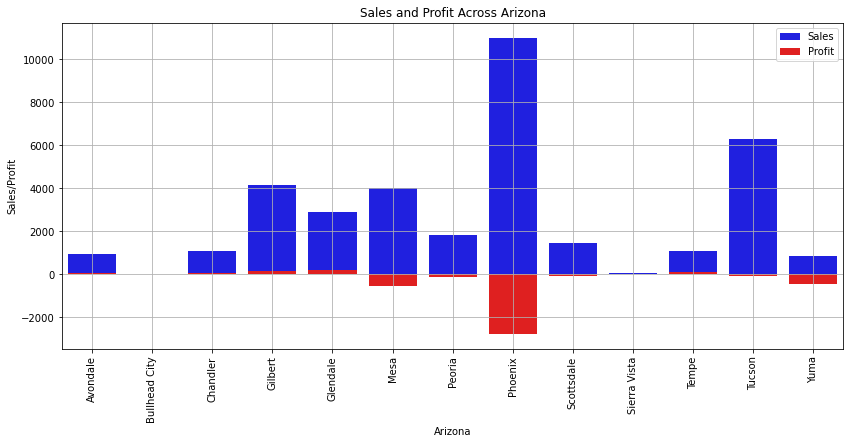

Sales Distribution Across Arizona


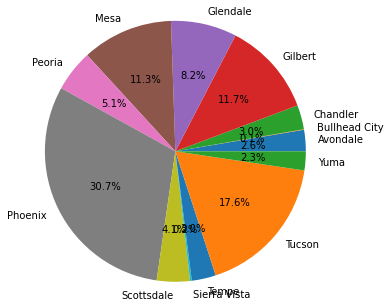

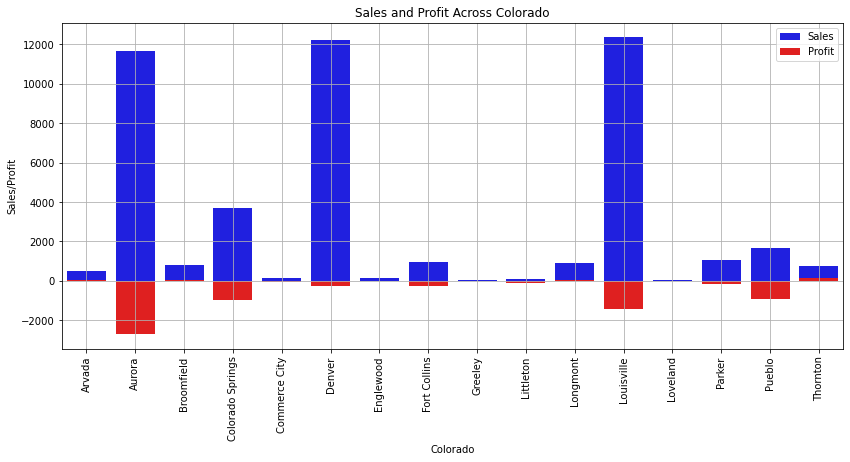

Sales Distribution Across Colorado


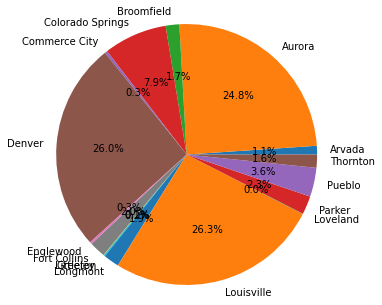

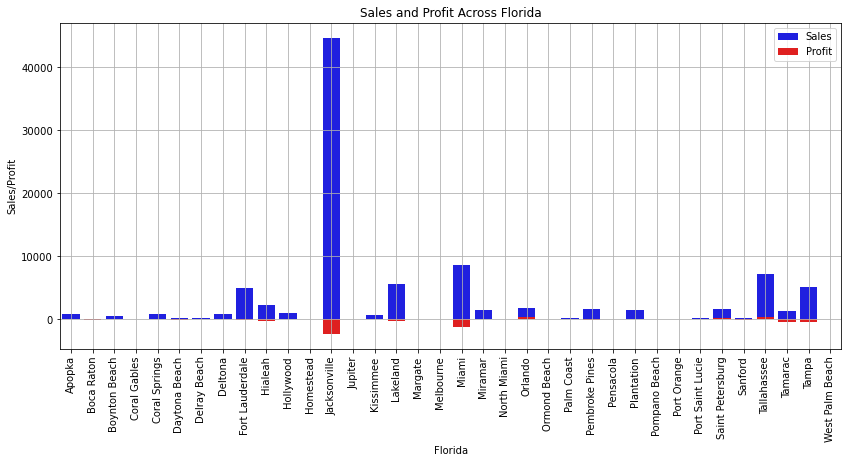

Sales Distribution Across Florida


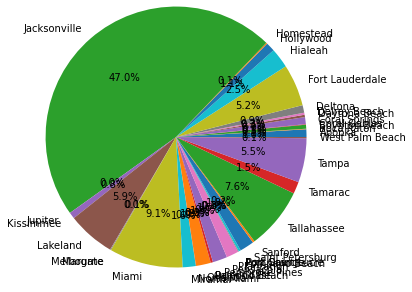

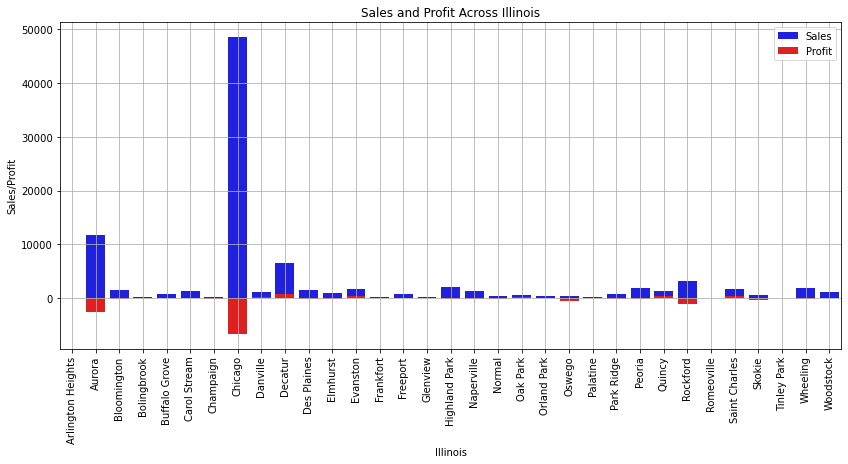

Sales Distribution Across Illinois


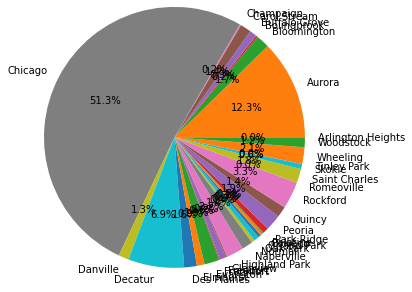

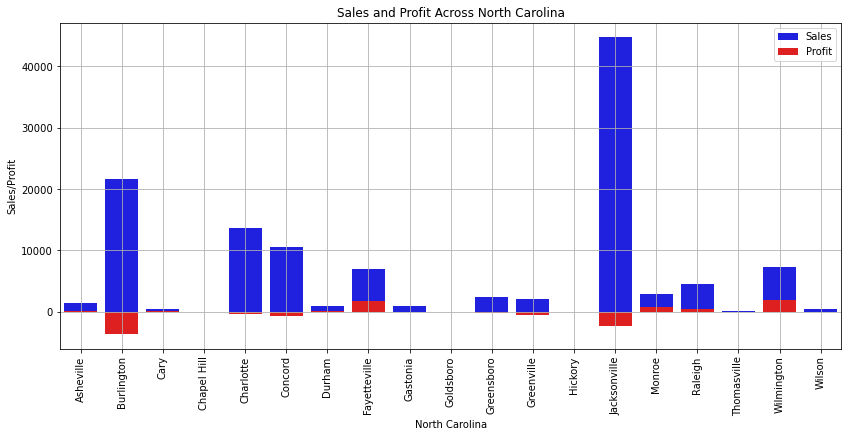

Sales Distribution Across North Carolina


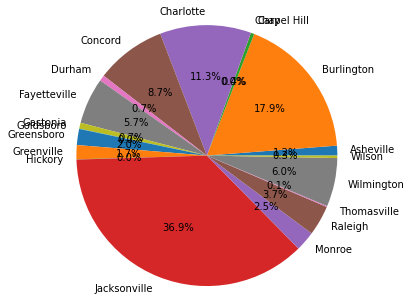

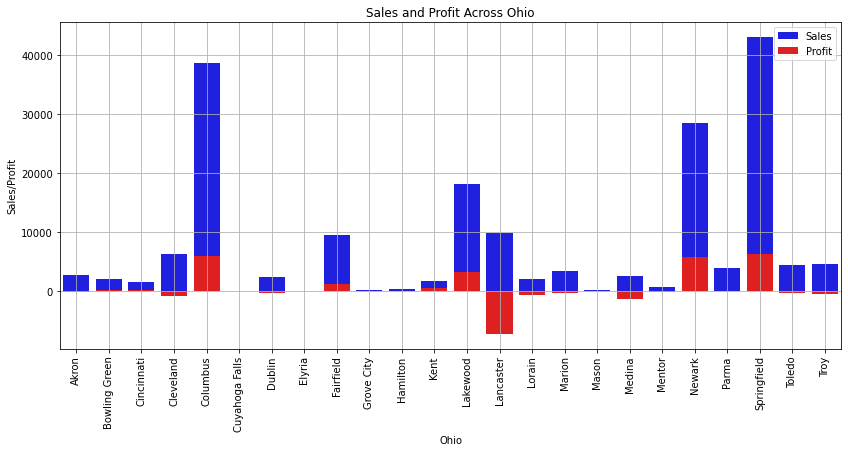

Sales Distribution Across Ohio


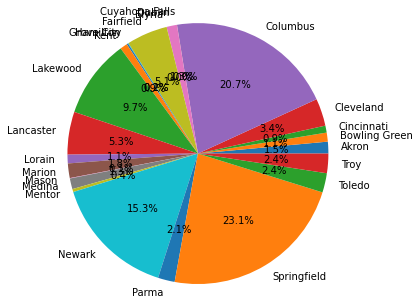

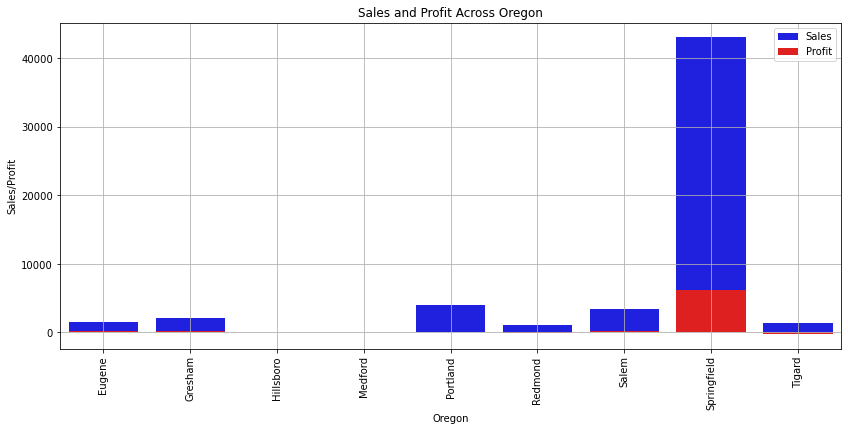

Sales Distribution Across Oregon


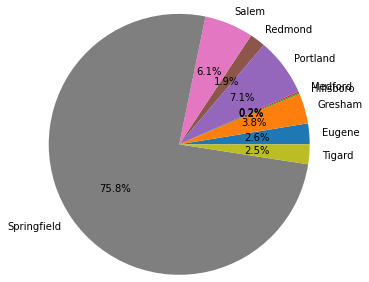

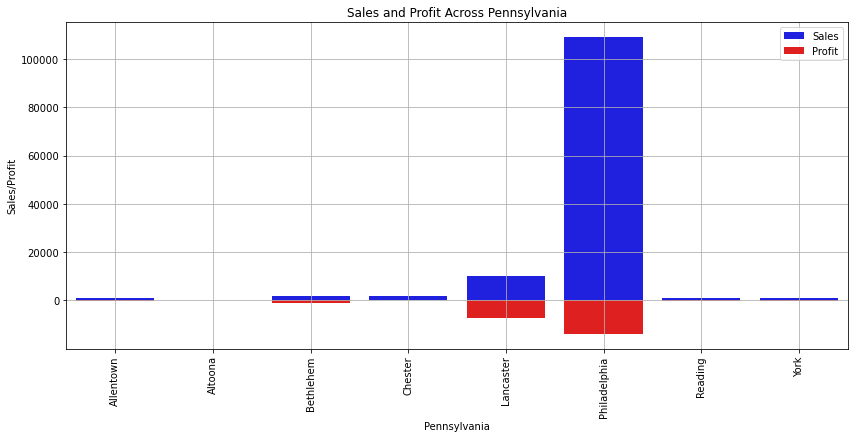

Sales Distribution Across Pennsylvania


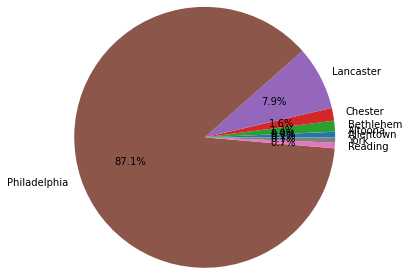

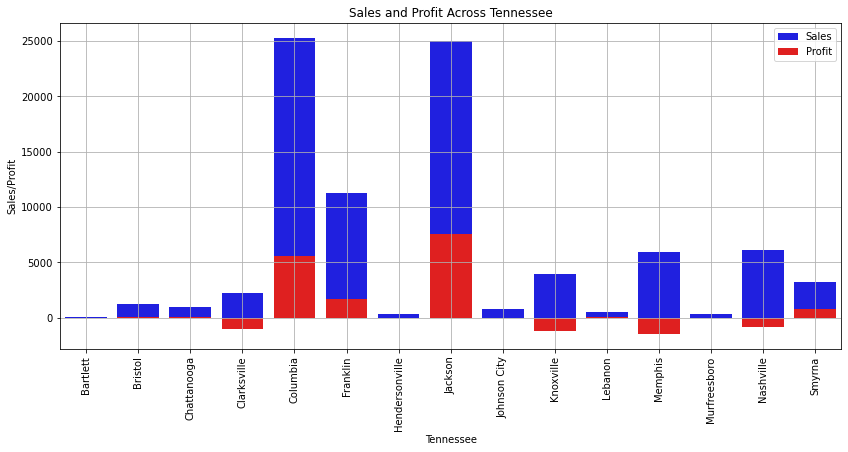

Sales Distribution Across Tennessee


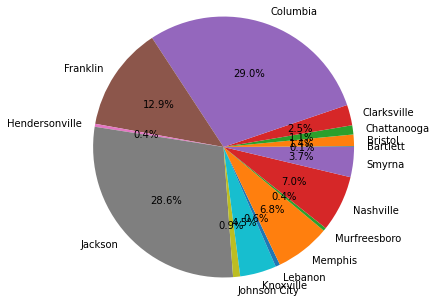

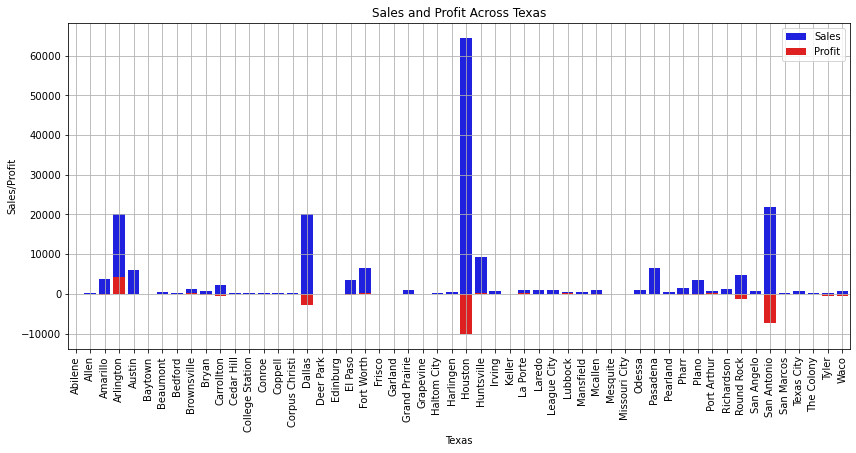

Sales Distribution Across Texas


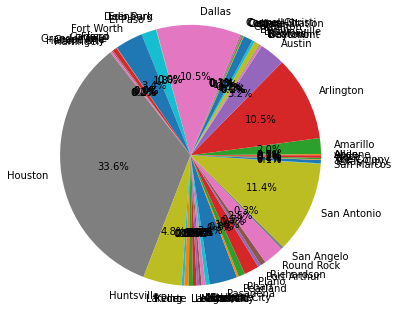

In [36]:
for state in loss:
    cities = sorted(store['City'][store['State']==state].unique())
    sales,profits=[],[]
    for city in cities:
        sales.append(store['Sales'][store['City']==city].sum())
        profits.append(store['Profit'][store['City']==city].sum())
    plotbar(14,6,cities,sales,profits,'Sales','Profit','Sales and Profit Across '+state,state,'Sales/Profit')
    pieplot(sales,cities,1.5,'Sales Distribution Across '+state)

Important Inferences:
1. Phoenix has the highest sales in Arizona but has the lowest profit.
2. No city in Colorado produces profits.
2. Aurora and Louisville have very high sales but still don't churn out profits.
3. Jacksonville has the highest sales in Florida but has the lowest profit.
4. Chicago has the highest sales in Illinois but has the lowest profit.
5. Burlington has mid level sales in North Carolina but has the lowest profit.
6. Lancaster has almost equal amount of sales and losses.
7. Philadelphia has the highest sales in Pennsylvania but has the lowest profit.
8. There are various cities in Tennessee which have small losses.
9. Houston has the highest sales in Texas but has the lowest profit and a couple of cities where sales are mid level but chrun out losses.

Major trend which can be observed after analysing all the data is that even though there are cities with high amount of sales, they don't produce profits.

#### Category of products
Let's take a look at the profit and sales distribution across various categories of products.

In [37]:
profits = store.groupby(['Category','Sub-Category'])['Profit'].sum()
sales = store.groupby(['Category','Sub-Category'])['Sales'].sum()
store.groupby(['Category','Sub-Category'])[['Sales','Profit']].sum()

Sales      Profit
Category        Sub-Category                         
Furniture       Bookcases     114879.9963  -3472.5560
                Chairs        328449.1030  26590.1663
                Furnishings    91705.1640  13059.1436
                Tables        206965.5320 -17725.4811
Office Supplies Appliances    107532.1610  18138.0054
                Art            27118.7920   6527.7870
                Binders       203412.7330  30221.7633
                Envelopes      16476.4020   6964.1767
                Fasteners       3024.2800    949.5182
                Labels         12486.3120   5546.2540
                Paper          78479.2060  34053.5693
                Storage       223843.6080  21278.8264
                Supplies       46673.5380  -1189.0995
Technology      Accessories   167380.3180  41936.6357
                Copiers       149528.0300  55617.8249
                Machines      189238.6310   3384.7569
                Phones        330007.0540  44515.7306

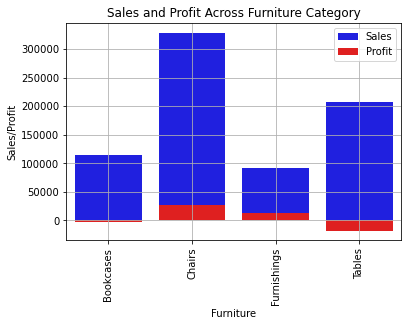

Sales Distribution Across Furniture


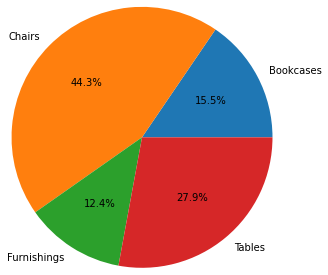

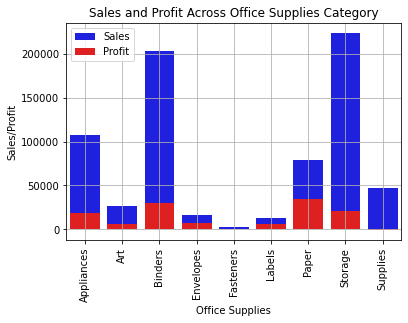

Sales Distribution Across Office Supplies


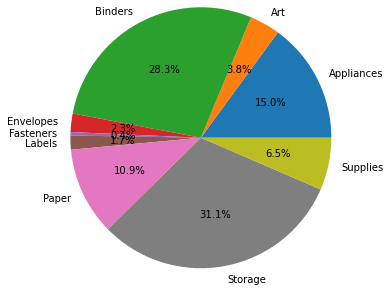

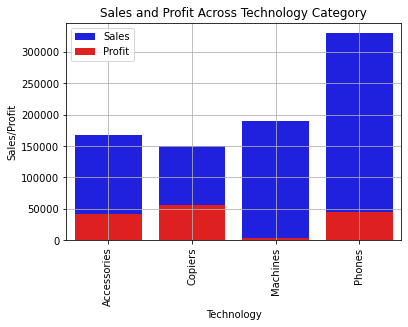

Sales Distribution Across Technology


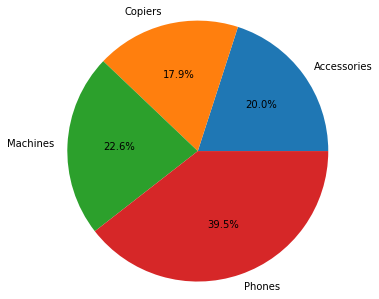

In [38]:
furn = sorted(store['Sub-Category'][store['Category']=='Furniture'].unique())
os = sorted(store['Sub-Category'][store['Category']=='Office Supplies'].unique())
tech = sorted(store['Sub-Category'][store['Category']=='Technology'].unique())
plotbar(6,4,furn,sales[0:4],profits[0:4],'Sales','Profit','Sales and Profit Across Furniture Category','Furniture','Sales/Profit')
pieplot(sales[:4],furn,1.5,'Sales Distribution Across Furniture')
plotbar(6,4,os,sales[4:13],profits[4:13],'Sales','Profit','Sales and Profit Across Office Supplies Category','Office Supplies','Sales/Profit')
pieplot(sales[4:13],os,1.5,'Sales Distribution Across Office Supplies')
plotbar(6,4,tech,sales[13:],profits[13:],'Sales','Profit','Sales and Profit Across Technology Category','Technology','Sales/Profit')
pieplot(sales[13:],tech,1.5,'Sales Distribution Across Technology')

Important Inferences:
1. Tables are the major loss point and Chairs are the strong point for the Furniture category.
2. Profits in the Supplies sub-category can be improved in Office Supplies.
3. Machines produce second highest sales in Technology category but don't generate significant profits.

#### Customer Segment
Let's analyse the sales and profit distribution across various segments.

In [39]:
store.groupby('Segment')[['Sales','Profit']].sum()

,Sales,Profit
Segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.296531e+05,60298.6785


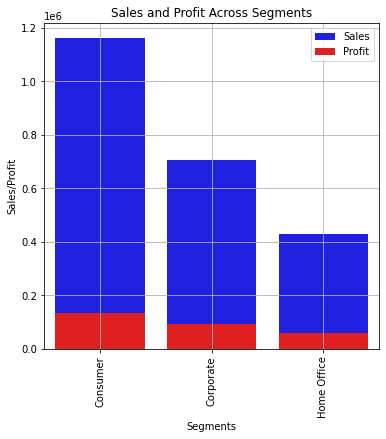

Sales


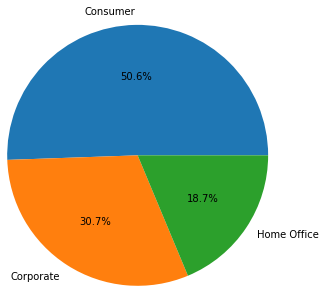

Profits


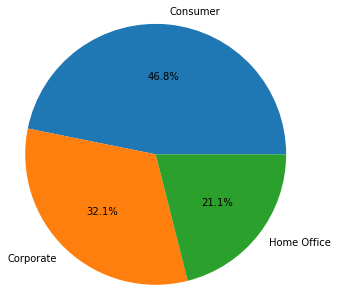

In [40]:
segments = sorted(store['Segment'].unique())
profits = store.groupby('Segment')['Profit'].sum()
sales = store.groupby('Segment')['Sales'].sum()
plotbar(6,6,segments,sales,profits,'Sales','Profit','Sales and Profit Across Segments','Segments','Sales/Profit')
pieplot(sales,segments,1.5,'Sales')
pieplot(profits,segments,1.5,'Profits')

Important Inferences:
1. There are no losses reported across segments.
2. Consumer segment has a highest chunk of the overall sales,makes up just over 50% of overall sales.
3. But similar distribution isn't observed with profits, where Consumer segment makes up less than 50% of the overall profits. 

Let's dig deeper into the Sub-Categories preffered by the segments.

In [41]:
profit = store.groupby(['Segment','Sub-Category'])['Profit'].sum()
sales = store.groupby(['Segment','Sub-Category'])['Sales'].sum()
store.groupby(['Segment','Sub-Category'])[['Sales','Profit']].sum()

Sales      Profit
Segment     Sub-Category                         
Consumer    Accessories    87105.2380  20735.9225
            Appliances     52819.5810   6981.9282
            Art            14251.9300   3454.3011
            Binders       118161.0090  17995.5972
            Bookcases      68632.7290  -4435.6382
            Chairs        172862.7420  13235.3319
            Copiers        69819.0700  24083.7106
            Envelopes       7771.1460   3264.4126
            Fasteners       1680.9420    576.8008
            Furnishings    49620.0460   7919.4227
            Labels          6709.2620   3075.9884
            Machines       79542.8250   2141.0618
            Paper          36324.3680  15534.6436
            Phones        169932.7640  23837.1147
            Storage       100492.4020   7104.2004
            Supplies       25741.4960  -1657.5513
            Tables         99933.7950  -9728.0378
Corporate   Accessories    48190.5640  12707.4805
            Appliances     36588.6830   7429.8952
            Art             8590.4480   2004.6477
            Binders        51560.3130   6377.3201
            Bookcases      34005.9243    638.4502
            Chairs         99140.8780   8344.6565
            Copiers        46829.3860  18990.2789
            Envelopes       5942.6700   2571.2290
            Fasteners        783.2900    251.9030
            Furnishings    25001.2660   3508.2077
            Labels          4101.6460   1760.8273
            Machines       60276.7550    703.0190
            Paper          23883.1300  10361.5468
            Phones         91153.4140  11766.2196
            Storage        79790.9980   9131.0247
            Supplies       19435.2840    338.9264
            Tables         70871.7175  -4906.4986
Home Office Accessories    32084.5160   8493.2327
            Appliances     18123.8970   3726.1820
            Art             4276.4140   1068.8382
            Binders        33691.4110   5848.8460
            Bookcases      12241.3430    324.6320
            Chairs         56445.4830   5010.1779
            Copiers        32879.5740  12543.8354
            Envelopes       2762.5860   1128.5351
            Fasteners        560.0480    120.8144
            Furnishings    17083.8520   1631.5132
            Labels          1675.4040    709.4383
            Machines       49419.0510    540.6761
            Paper          18271.7080   8157.3789
            Phones         68920.8760   8912.3963
            Storage        43560.2080   5043.6013
            Supplies        1496.7580    129.5254
            Tables         36160.0195  -3090.9447

In [42]:
sub = sorted(store['Sub-Category'].unique())

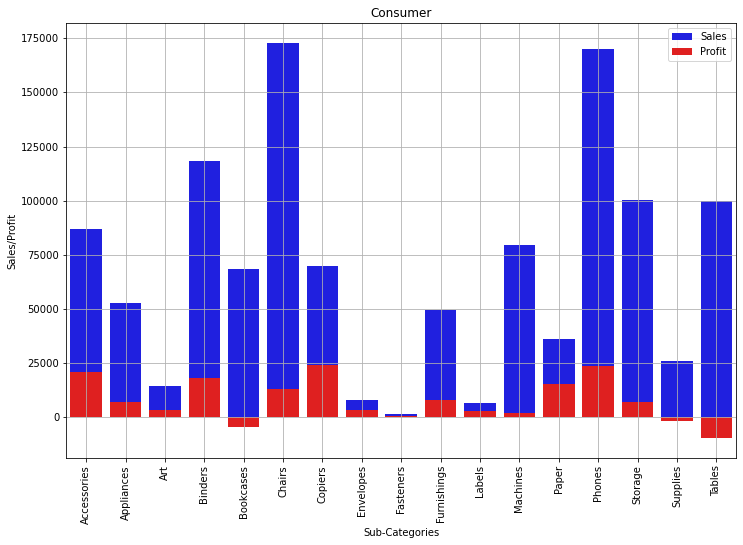

Sales Distribution Across Consumer Segment


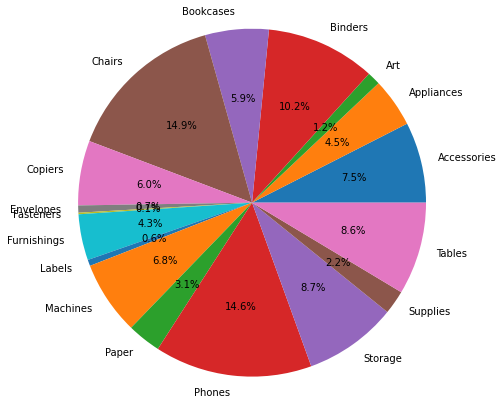

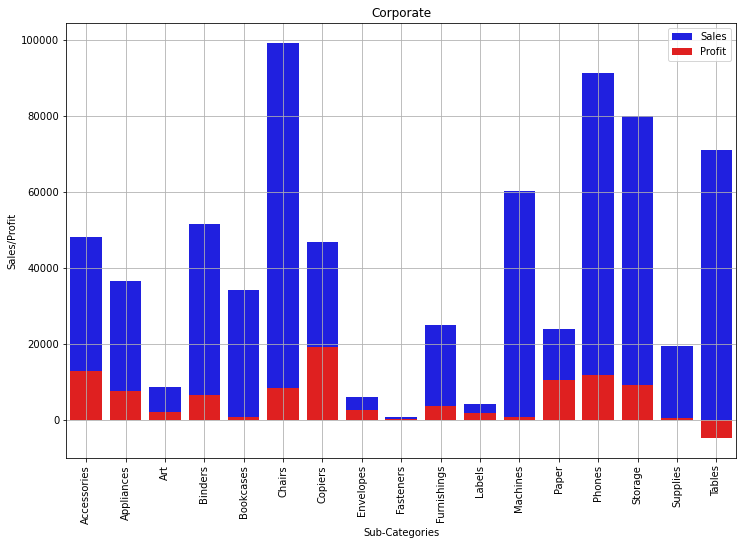

Sales Distribution Across Corporate Segment


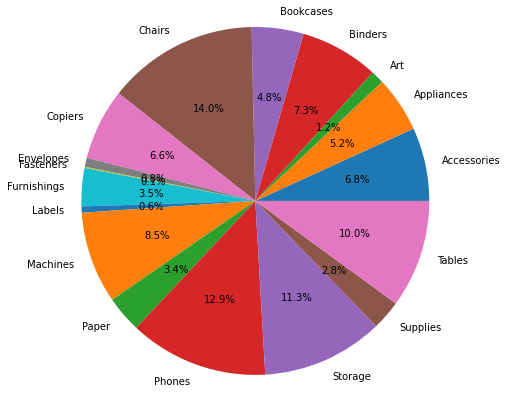

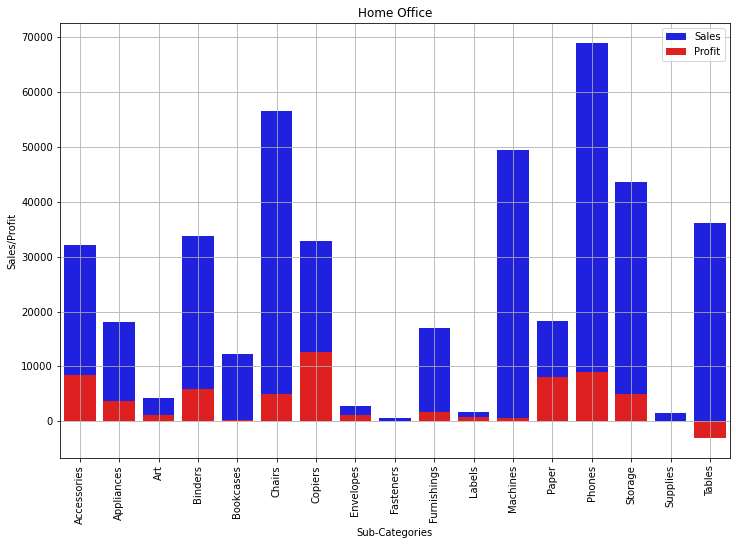

Sales Distribution Across Home Office Segment


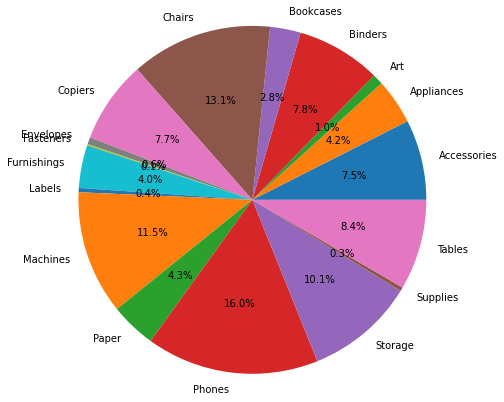

In [43]:
for i,seg in zip(range(3),segments):
    plotbar(12,8,sub,sales[i*17:(i+1)*17],profit[i*17:(i+1)*17],'Sales','Profit',seg,'Sub-Categories','Sales/Profit')
    pieplot(sales[i*17:(i+1)*17],sub,2,'Sales Distribution Across '+seg+' Segment')

Important Inferences:
1. Chairs, Phones, Storage and Tables make the major chunk of sales across segments.
2. Accessories,Appliances,Binders, Copiers and Paper contribute significantly to the profits but have less share in the sales individually.
3. Sub-Categories which have low sales, tend to produce profits.
4. Tables have significant sales but don't generate profits.

#### Shipping Mode
Let's analyse profits and sales across various shipping modes.

In [44]:
store.groupby('Ship Mode')[['Sales','Profit']].sum()

,Sales,Profit
Ship Mode,,
First Class,3.514284e+05,48969.8399
Same Day,1.283631e+05,15891.7589
Second Class,4.591936e+05,57446.6354
Standard Class,1.358216e+06,164088.7875


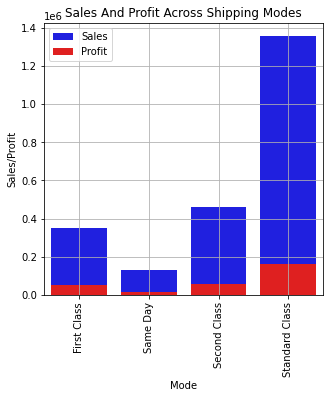

Sales Across Various Shipping Modes


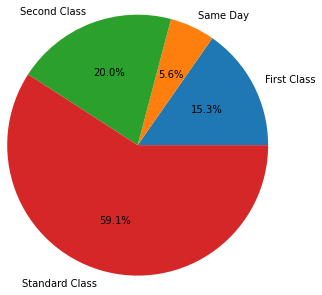

Profit Across Various Shipping Modes


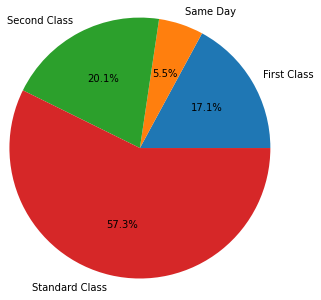

In [45]:
mode = sorted(store['Ship Mode'].unique())
sales = store.groupby('Ship Mode')['Sales'].sum()
profit = store.groupby('Ship Mode')['Profit'].sum()
plotbar(5,5,mode,sales,profit,'Sales','Profit','Sales And Profit Across Shipping Modes','Mode','Sales/Profit')
pieplot(sales,mode,1.5,'Sales Across Various Shipping Modes')
pieplot(profit,mode,1.5,'Profit Across Various Shipping Modes')

Important Inferences:
1. No losses generated across various shipping modes.
2. Similar distribution across sales and profits for every shipping mode.

Let's look at the Sub-Categories shipped across various modes.

In [46]:
store.groupby(['Ship Mode','Sub-Category'])[['Sales','Profit']].sum()

Sales      Profit
Ship Mode      Sub-Category                         
First Class    Accessories    22226.6920   5907.4131
               Appliances     15726.0240   3543.8611
               Art             3470.0880    750.3500
               Binders        36157.8130   4128.1425
               Bookcases      21065.3189   -305.9975
...                                  ...         ...
Standard Class Paper          45160.2620  19478.8185
               Phones        197147.7220  25953.3506
               Storage       140250.7520  11852.0534
               Supplies       13216.5240   -875.5835
               Tables        124826.6615 -11910.0122

[68 rows x 2 columns]

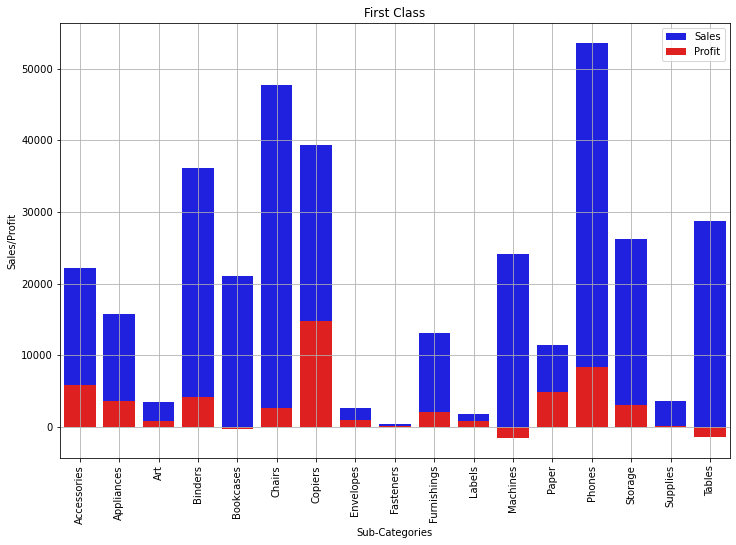

Sales Distribution Across First Class


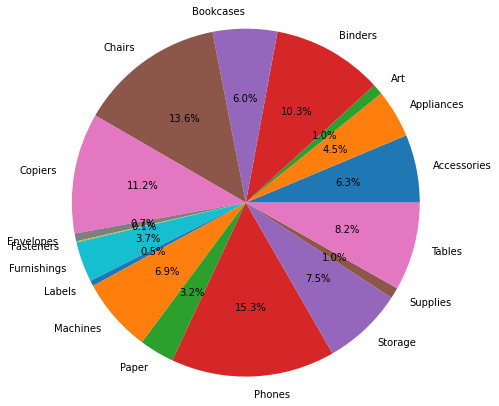

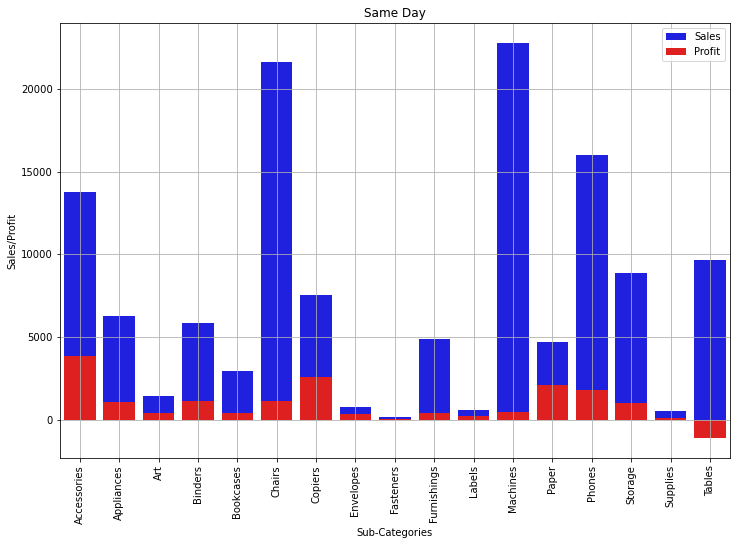

Sales Distribution Across Same Day


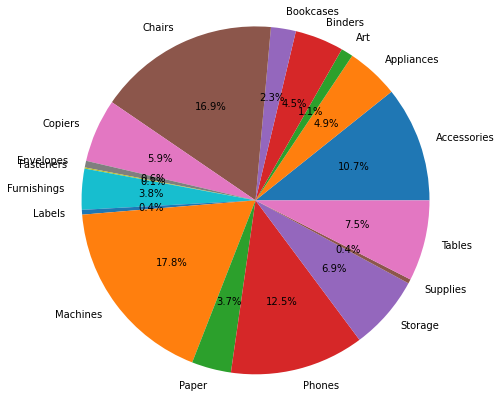

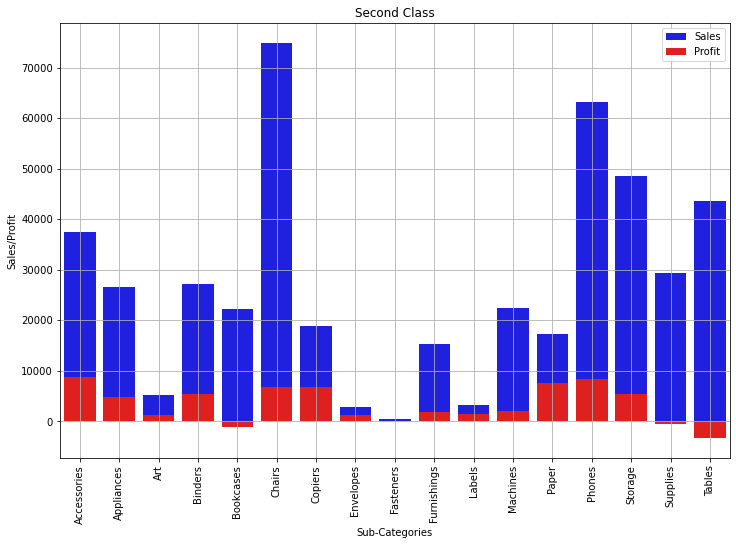

Sales Distribution Across Second Class


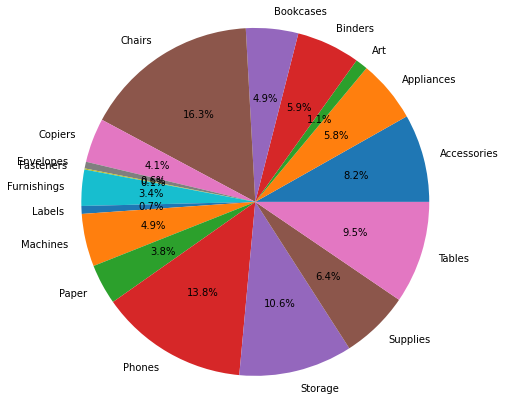

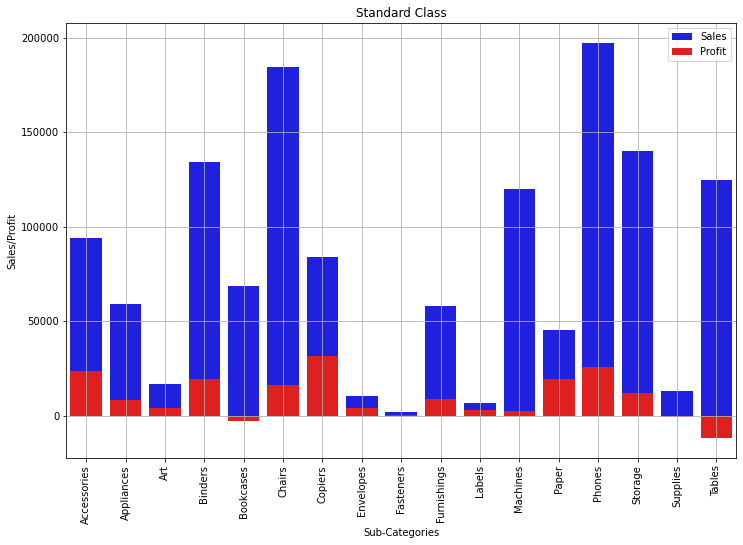

Sales Distribution Across Standard Class


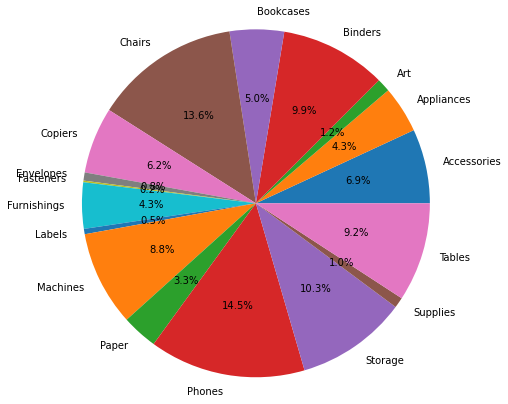

In [48]:
profit = store.groupby(['Ship Mode','Sub-Category'])['Profit'].sum()
sales = store.groupby(['Ship Mode','Sub-Category'])['Sales'].sum()
for i,md in zip(range(4),mode):
    plotbar(12,8,sub,sales[i*17:(i+1)*17],profit[i*17:(i+1)*17],'Sales','Profit',md,'Sub-Categories','Sales/Profit')
    pieplot(sales[i*17:(i+1)*17],sub,2,'Sales Distribution Across '+md)

Important Inferences:
1. Chairs and Phones contibute significantly towards sales across different modes.
2. Accessories, Binders, Copiers and Paper contribute heavily to the profit but make a smaller share of sales individually.
3. Tables generate losses with significant amount of sales.

In addition to above inferences:
1. First Class: Copiers and Art make up the majority of sales. Appliances and Storage make up significant share of the profits but are on the mid level of sales.
2. Same Day: Machines and Accesories make up majority of sales. Storage contribute heavily to the profit but make a smaller share of sales individually.
3. Second Class: Storage makes up majority of sales. Applicances contribute heavily to the profit but make a smaller share of sales individually.
4. Standard: Storage makes up majority of sales.

#### Discounts
Let's analyse the data for various percentages of discounts given to customers.

In [49]:
store.groupby('Discount')[['Sales','Profit']].sum()

,Sales,Profit
Discount,,
0.00,1.087908e+06,320987.6032
0.10,5.436935e+04,9029.1770
0.15,2.755852e+04,1418.9915
0.20,7.645944e+05,90337.3060
0.30,1.032267e+05,-10369.2774
0.32,1.449346e+04,-2391.1377
0.40,1.164178e+05,-23057.0504
0.45,5.484974e+03,-2493.1111
0.50,5.891854e+04,-20506.4281


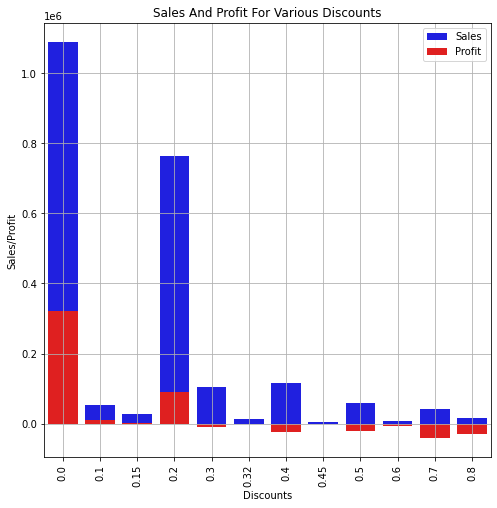

Sales Distribution Across Discounts


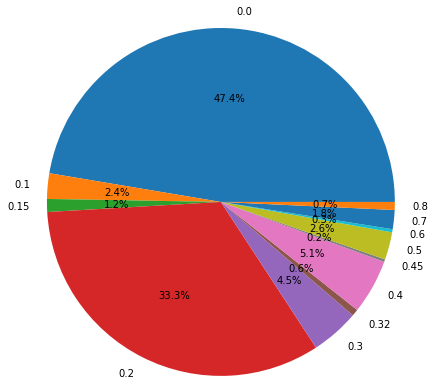

In [51]:
disc = sorted(store['Discount'].unique())
profit = store.groupby('Discount')['Profit'].sum()
sales = store.groupby('Discount')['Sales'].sum()
plotbar(8,8,disc,sales,profit,'Sales','Profit','Sales And Profit For Various Discounts','Discounts','Sales/Profit')
pieplot(sales,disc,2,'Sales Distribution Across Discounts')

Important Inferences:
1. As expected higher discounts result in higher losses.
2. Even though discounts are being provided, the respective sales are very low.

Let's look at the discounts provided for various Categories.

In [52]:
store.groupby(['Category','Discount'])[['Profit','Sales']].sum()

Profit        Sales
Category        Discount                          
Furniture       0.00       58133.0764  256025.2700
                0.10        7111.0119   46634.2470
                0.15        1418.9915   27558.5215
                0.20        6265.9491  216631.0160
                0.30      -10695.3169   99470.3500
                0.32       -2391.1377   14493.4588
                0.40      -16187.3968   45614.4060
                0.45       -2493.1111    5484.9740
                0.50      -12871.1990   20983.4700
                0.60       -5944.6552    6644.7000
                0.70       -3894.9394    2459.3820
Office Supplies 0.00      130506.1064  442150.0000
                0.10        1086.0808    4324.1490
                0.20       38038.7512  233049.7360
                0.70      -16601.0984   22559.3910
                0.80      -30539.0392   16963.7560
Technology      0.00      132348.4204  389733.2000
                0.10         832.0843    3410.9550
                0.20       46032.6057  314913.6160
                0.30         326.0395    3756.3050
                0.40       -6869.6536   70803.3780
                0.50       -7635.2291   37935.0700
                0.70      -19579.3191   15601.5090

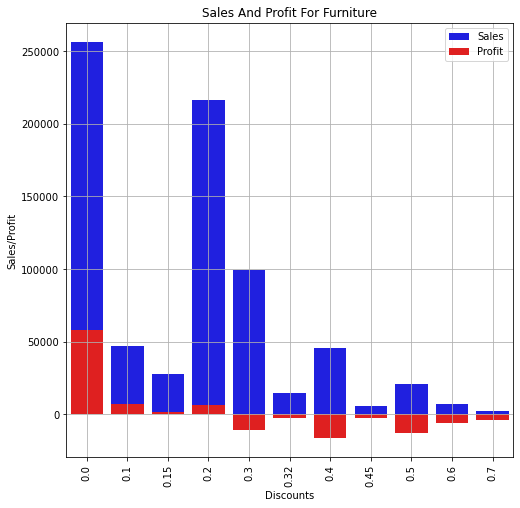

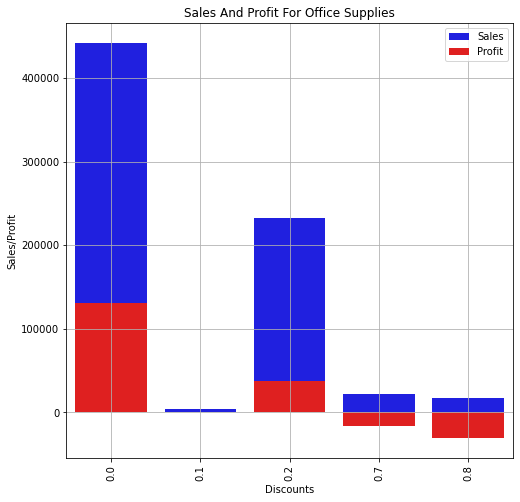

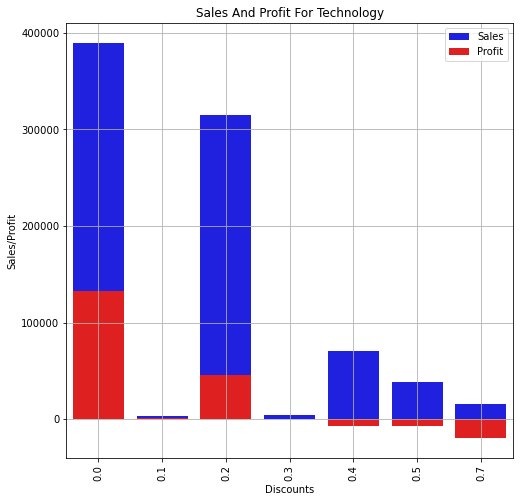

In [53]:
sales = store.groupby(['Category','Discount'])['Sales'].sum()
profit = store.groupby(['Category','Discount'])['Profit'].sum()
furn = sorted(store['Discount'][store['Category']=='Furniture'].unique())
os = sorted(store['Discount'][store['Category']=='Office Supplies'].unique())
tech = sorted(store['Discount'][store['Category']=='Technology'].unique())
plotbar(8,8,furn,sales[:11],profit[:11],'Sales','Profit','Sales And Profit For Furniture','Discounts','Sales/Profit')
plotbar(8,8,os,sales[11:16],profit[11:16],'Sales','Profit','Sales And Profit For Office Supplies','Discounts','Sales/Profit')
plotbar(8,8,tech,sales[16:],profit[16:],'Sales','Profit','Sales And Profit For Technology','Discounts','Sales/Profit')

Important Inferences:
1. Higher discounts didn't produce higher sales.
2. Discounts of more than 30% don't generate any profits.
3. Discount of 20% generate the most sales among all the discounts given.

#### Conclusion:

Areas which need improvement:
1. Attempts should be made to improve sales in the Central and South region.
2. One trend which was observed across loss bearing states is that even though the cities in those states generated good amount of sales, they don't churn out profits. This could be avoided by providing much more polished services.
3. The condition in Texas needs immediate improvement since it contributes strongly towards sales(3rd highest) but still churn out losses. 
3. Furniture category isn't making any significant contributions to the profits. Particularly Tbales aren't beneficial across any states. Improvement or scrapping of this sub-category should be considered.
4. Supplies sub-category need help as they have good amount of sales but still run into losses.
5. Overall Technology category is performing pretty good, but Machines need to improve as they have the second highest sales in the category but barely generate any profit.
6. Consumer segement has a strong hold on sales but similar trend isn't observed with respect profits.
7. Improving sales for Home Office and Corporate segments should be prioritised.
8. No significant changes can be made to shipping modes, as no particular trend could be observed.
9. Discounts are very important for attracting more customers therefore even though higher discounts generate losses, we can't scrap them. 
10. Interesting trend which was observed among discounts was that 20% discount attracted alot of customers, maybe this has a psychological effect on customers where they prefer it over the rest of the discounts. Since higher discounts generally mean the products have become outdated or might have some minor defects. 
11. Rather than providing more discounts, which doesn't seem to be elevating the sales, organisation should concentrate more on marketing various products to appropriate customer segments. They should make use of recommender systems to provide customers an amazing shopping experience.